# Assignment 5 Recommender System and NN with numpy

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('radio_songs.csv')

In [3]:
df.head()

,user,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = df.set_index('user')

In [5]:
df.head()

,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,all that remains,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
user,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1. Collaborative Filtering

Use this user-item matrix to:

A. Recommend 10 songs to users who have listened to 'u2' and 'pink floyd'. Use item-item collaborative filtering to find songs that are similar using spatial distance with cosine. Since this measures the distance you need to subtract from 1 to get similarity as shown below.

from scipy.spatial.distance import cosine

similarity = 1 - cosine(item1, item2).

In [6]:
# Binary matrix to be sure all values are 0 or 1
df = df.applymap(lambda x: 1 if x == 1 else 0)

# List of artists
artists = df.columns.tolist()

# Item vector transform to get the item-user matrix
item_vectors = df.T

# Similarity (1 - cosine distance)
def calculate_similarity(item1, item2):
    return 1 - cosine(item1, item2)


/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_26800/3259021008.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x == 1 else 0)


In [7]:
def part_a_recommendations():
    
    # Getting the u2 and pink floyd vectors
    u2_vector = item_vectors.loc['u2']
    pink_floyd_vector = item_vectors.loc['pink floyd']
    
    # Similarities to u2
    u2_similarities = []
    for artist in item_vectors.index:
        if artist != 'u2':
            similarity = calculate_similarity(u2_vector, item_vectors.loc[artist])
            u2_similarities.append((artist, similarity))
    
    # Sorting by similarity
    u2_similarities.sort(key=lambda x: x[1], reverse=True)
    print("Top 10 artists similar to U2:")
    for i, (artist, similarity) in enumerate(u2_similarities[:10], 1):
        print(f"{i}. {artist}: {similarity:.4f}")
    
    # Similarities to Pink Floyd
    pf_similarities = []
    for artist in item_vectors.index:
        if artist != 'pink floyd':
            similarity = calculate_similarity(pink_floyd_vector, item_vectors.loc[artist])
            pf_similarities.append((artist, similarity))
    
    # Sorting by similarity
    pf_similarities.sort(key=lambda x: x[1], reverse=True)
    print("\nTop 10 artists similar to Pink Floyd:")
    for i, (artist, similarity) in enumerate(pf_similarities[:10], 1):
        print(f"{i}. {artist}: {similarity:.4f}")
    
    # Combined similarities
    combined_similarities = []
    for artist in item_vectors.index:
        if artist != 'u2' and artist != 'pink floyd':
            u2_sim = calculate_similarity(u2_vector, item_vectors.loc[artist])
            pf_sim = calculate_similarity(pink_floyd_vector, item_vectors.loc[artist])
            avg_sim = (u2_sim + pf_sim) / 2
            combined_similarities.append((artist, avg_sim))
    
    # Sorting by similarity
    combined_similarities.sort(key=lambda x: x[1], reverse=True)
    print("\nTop 10 recommendations for users who like U2 and Pink Floyd:")
    for i, (artist, similarity) in enumerate(combined_similarities[:10], 1):
        print(f"{i}. {artist}: {similarity:.4f}")
        
    return combined_similarities

In [8]:
combined_similarities = part_a_recommendations()

Top 10 artists similar to U2:
1. ac/dc: 0.2236
2. audioslave: 0.2236
3. amy winehouse: 0.2041
4. cascada: 0.1890
5. bloodhound gang: 0.1667
6. beatsteaks: 0.1508
7. abba: 0.0000
8. adam green: 0.0000
9. aerosmith: 0.0000
10. afi: 0.0000

Top 10 artists similar to Pink Floyd:
1. the rolling stones: 0.3333
2. atreyu: 0.2887
3. audioslave: 0.2582
4. beastie boys: 0.2357
5. abba: 0.0000
6. ac/dc: 0.0000
7. adam green: 0.0000
8. aerosmith: 0.0000
9. afi: 0.0000
10. air: 0.0000

Top 10 recommendations for users who like U2 and Pink Floyd:
1. audioslave: 0.2409
2. coldplay: 0.1741
3. bob dylan: 0.1667
4. bob marley & the wailers: 0.1443
5. crystal castles: nan
6. david bowie: 0.2041
7. atreyu: 0.1443
8. dark tranquillity: 0.1443
9. beastie boys: 0.1179
10. ac/dc: 0.1118


/opt/anaconda3/lib/python3.12/site-packages/scipy/spatial/distance.py:647: RuntimeWarning: invalid value encountered in divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


B. Find user most similar to user 1606. Use user-user collaborative filtering with cosine similarity. List the recommended songs for user 1606 (Hint: find the songs listened to by the most similar user).

In [9]:
def part_b_similar_user():
    # Checking if user 1606 exists
    if 1606 not in df.index:
        print("User 1606 not found!")
        return None, None, None, None
    
    # User's 1606 vector
    user1606_vector = df.loc[1606]
    
    # Similarities between user 1606 and all others
    user_similarities = []
    for user_id in df.index:
        if user_id != 1606:
            similarity = calculate_similarity(user1606_vector, df.loc[user_id])
            user_similarities.append((user_id, similarity))
    
    # Sorting by similarity
    user_similarities.sort(key=lambda x: x[1], reverse=True)
    print("Top 5 users most similar to user 1606:")
    for i, (user_id, similarity) in enumerate(user_similarities[:5], 1):
        print(f"{i}. User {user_id}: {similarity:.4f}")
    
    # Getting the most similar user
    most_similar_user_id, highest_similarity = user_similarities[0]
    print(f"\nMost similar user: User {most_similar_user_id} (similarity: {highest_similarity:.4f})")
    
    # Songs that the most similar user has listened to
    most_similar_user_vector = df.loc[most_similar_user_id]
    songs_listened_by_similar_user = most_similar_user_vector[most_similar_user_vector == 1].index.tolist()
    
    # Songs that user 1606 has listened to
    songs_listened_by_1606 = user1606_vector[user1606_vector == 1].index.tolist()
    
    # Songs that the most similar user has listened to but user 1606 hasn't
    recommended_songs = [song for song in songs_listened_by_similar_user if song not in songs_listened_by_1606]
    
    print("\nRecommended songs for user 1606 from most similar user:")
    for i, song in enumerate(recommended_songs, 1):
        print(f"{i}. {song}")
        
    return user_similarities, most_similar_user_id, songs_listened_by_similar_user, songs_listened_by_1606


Top 5 users most similar to user 1606:
1. User 1144: 0.2774
2. User 144: 0.2236
3. User 543: 0.0000
4. User 691: 0.0000
5. User 792: nan

Most similar user: User 1144 (similarity: 0.2774)

Recommended songs for user 1606 from most similar user:
1. beastie boys
2. bob dylan
3. bob marley & the wailers
4. david bowie
5. eric clapton
6. johnny cash
7. pearl jam
8. pink floyd
9. the doors
10. the rolling stones
11. tom waits


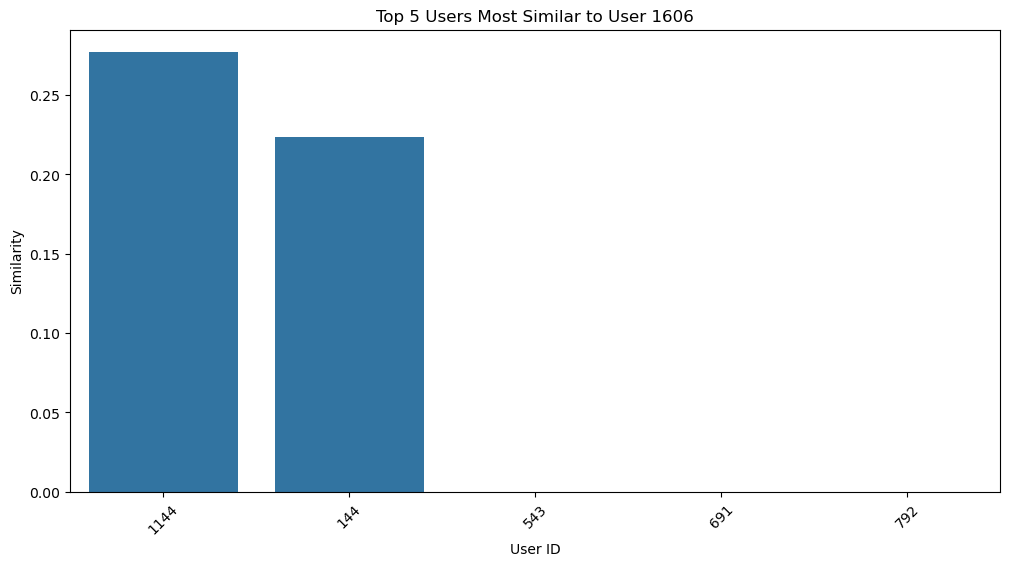

In [10]:
#Results
user_similarities, most_similar_user_id, songs_listened_by_similar_user, songs_listened_by_1606 = part_b_similar_user()
user_similarities
most_similar_user_id
songs_listened_by_similar_user
songs_listened_by_1606


# Similarities
def plot_similarities(user_similarities):
    # Take only the top 5 users
    top_5_users = user_similarities[:5]
    user_ids = [str(user[0]) for user in top_5_users]  # Convert user IDs to strings
    similarities = [user[1] for user in top_5_users]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=user_ids, y=similarities)
    plt.xticks(rotation=45)
    plt.xlabel('User ID')
    plt.ylabel('Similarity')
    plt.title('Top 5 Users Most Similar to User 1606')
    plt.show()

plot_similarities(user_similarities)

C. How many of the recommended songs has already been listened to by user 1606?

In [11]:
def part_c_already_listened(songs_listened_by_similar_user, songs_listened_by_1606):    
    if songs_listened_by_similar_user is None or songs_listened_by_1606 is None:
        print("Missing data from part B!")
        return
    
    # How many recommended songs user 1606 has already listened to
    already_listened_count = sum(1 for song in songs_listened_by_similar_user if song in songs_listened_by_1606)
    print(f"Number of recommended songs already listened to by user 1606: {already_listened_count}")
    
    print("\nArtists user 1606 has listened to:")
    for i, artist in enumerate(songs_listened_by_1606, 1):
        print(f"{i}. {artist}")
        
    print("\nOverlap between user 1606 and most similar user:")
    common_artists = [artist for artist in songs_listened_by_similar_user if artist in songs_listened_by_1606]
    for i, artist in enumerate(common_artists, 1):
        print(f"{i}. {artist}")
        
    return already_listened_count


In [12]:
already_listened_count = part_c_already_listened(songs_listened_by_similar_user, songs_listened_by_1606)

Number of recommended songs already listened to by user 1606: 2

Artists user 1606 has listened to:
1. abba
2. elvis presley
3. frank sinatra
4. the beatles

Overlap between user 1606 and most similar user:
1. elvis presley
2. the beatles


D. Use a combination of user-item approach to build a recommendation score for each song for each user using the following steps for each user-

1. For each song for the user row, get the top 10 similar songs and their similarity score.
2. For each of the top 10 similar songs, get a list of the user purchases.
3. Calculate a recommendation score as follows: sum(purchasehistory*similarityscore)/ sum(similarityscore).
4. What are the top 5 song recommendations for user 1606?

In [13]:
def part_d_combined_approach():
    item_similarity_matrix = {}
    for artist1 in artists:
        item_similarity_matrix[artist1] = {}
        for artist2 in artists:
            if artist1 != artist2:
                item_similarity_matrix[artist1][artist2] = calculate_similarity(
                    item_vectors.loc[artist1], item_vectors.loc[artist2]
                )
    
    # Top 10 similar items for an item
    def get_top_n_similar_items(item, n=10):
        if item not in item_similarity_matrix:
            return []
        
        similarities = [(other_item, similarity) for other_item, similarity in item_similarity_matrix[item].items()]
        similarities.sort(key=lambda x: x[1], reverse=True)
        return similarities[:n]
    
    # Recommendation scores for a user
    def calculate_recommendation_scores(user_id):
        if user_id not in df.index:
            return []
        
        user_vector = df.loc[user_id]
        
        # Artists the user has listened to
        listened_artists = user_vector[user_vector == 1].index.tolist()
        
        # Recommendation scores
        recommendation_scores = {artist: 0 for artist in artists if artist not in listened_artists}
        
        # Each artist the user has listened to
        for listened_artist in listened_artists:
            # Top 10 similar artists
            similar_artists = get_top_n_similar_items(listened_artist, 10)
            
            # For each similar artist
            for similar_artist, similarity in similar_artists:
                # If the user hasn't listened to this similar artist
                if similar_artist not in listened_artists:
                    # Adding it to the recommendation score
                    recommendation_scores[similar_artist] = recommendation_scores.get(similar_artist, 0) + similarity
        
        recommendations = [(artist, score) for artist, score in recommendation_scores.items()]
        recommendations.sort(key=lambda x: x[1], reverse=True)
        
        return recommendations
    
    # Recommendation scores for user 1606
    user1606_recommendations = calculate_recommendation_scores(1606)
    
    print("Top 10 recommendations for user 1606 using combined approach:")
    for i, (artist, score) in enumerate(user1606_recommendations[:10], 1):
        print(f"{i}. {artist}: {score:.4f}")


In [14]:
if __name__ == "__main__":
    combined_similarities = part_a_recommendations()
    user_similarities, most_similar_user_id, songs_listened_by_similar_user, songs_listened_by_1606 = part_b_similar_user()
    already_listened_count = part_c_already_listened(songs_listened_by_similar_user, songs_listened_by_1606)
    user1606_recommendations = part_d_combined_approach()

def visualize_similarity_matrix(artists_subset, matrix):
    subset_matrix = np.zeros((len(artists_subset), len(artists_subset)))
    
    for i, artist1 in enumerate(artists_subset):
        for j, artist2 in enumerate(artists_subset):
            if artist1 != artist2:
                subset_matrix[i, j] = matrix[artist1][artist2]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(subset_matrix, annot=True, cmap='viridis', 
                xticklabels=artists_subset, yticklabels=artists_subset)
    plt.title('Artist Similarity Matrix')
    plt.tight_layout()
    plt.show()


/opt/anaconda3/lib/python3.12/site-packages/scipy/spatial/distance.py:647: RuntimeWarning: invalid value encountered in divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


Top 10 artists similar to U2:
1. ac/dc: 0.2236
2. audioslave: 0.2236
3. amy winehouse: 0.2041
4. cascada: 0.1890
5. bloodhound gang: 0.1667
6. beatsteaks: 0.1508
7. abba: 0.0000
8. adam green: 0.0000
9. aerosmith: 0.0000
10. afi: 0.0000

Top 10 artists similar to Pink Floyd:
1. the rolling stones: 0.3333
2. atreyu: 0.2887
3. audioslave: 0.2582
4. beastie boys: 0.2357
5. abba: 0.0000
6. ac/dc: 0.0000
7. adam green: 0.0000
8. aerosmith: 0.0000
9. afi: 0.0000
10. air: 0.0000

Top 10 recommendations for users who like U2 and Pink Floyd:
1. audioslave: 0.2409
2. coldplay: 0.1741
3. bob dylan: 0.1667
4. bob marley & the wailers: 0.1443
5. crystal castles: nan
6. david bowie: 0.2041
7. atreyu: 0.1443
8. dark tranquillity: 0.1443
9. beastie boys: 0.1179
10. ac/dc: 0.1118
Top 5 users most similar to user 1606:
1. User 1144: 0.2774
2. User 144: 0.2236
3. User 543: 0.0000
4. User 691: 0.0000
5. User 792: nan

Most similar user: User 1144 (similarity: 0.2774)

Recommended songs for user 1606 from 

/opt/anaconda3/lib/python3.12/site-packages/scipy/spatial/distance.py:647: RuntimeWarning: invalid value encountered in divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


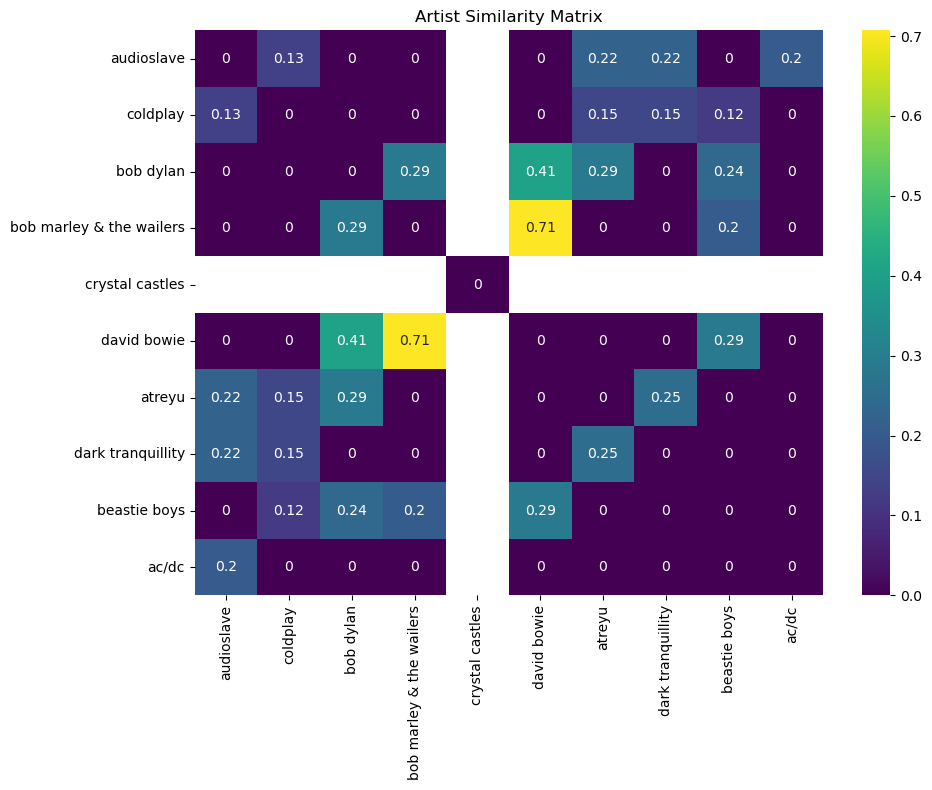

In [19]:
# Item similarity matrix
item_similarity_matrix = {}
for artist1 in artists:
	item_similarity_matrix[artist1] = {}
	for artist2 in artists:
		if artist1 != artist2:
			item_similarity_matrix[artist1][artist2] = calculate_similarity(
				item_vectors.loc[artist1], item_vectors.loc[artist2]
			)

# Similarity matrix for the top artists
top_artists = [item[0] for item in combined_similarities[:10]]
visualize_similarity_matrix(top_artists, item_similarity_matrix)

## 2. Conceptual questions

1. Name 2 other similarity measures that you can use instead of cosine similarity above.

_- Pearson Correlation Coefficient: This measures the linear correlation between two variables, ranging from -1 which means perfect negative correlation to +1 which is perfect positive correlation. It's particularly useful for recommender systems because it accounts for differences in user rating scales, since some users rate everything highly, others are more critical. The formula is:_

_pearson(x, y) = cov(x, y) / (σx * σy)_

_Where cov is covariance and σ represents the standard deviation._

_-Jaccard Similarity: This measures similarity between sample sets by comparing what they have in common with what they have in total. It's calculated as the size of the intersection divided by the size of the union:_

_jaccard(A, B) = |A ∩ B| / |A ∪ B|_

_This is particularly useful for binary data as it focuses on the presence or the absence rather than the values._

2. What is needed to build a Content-Based Recommender system?

_-Item features: Detailed metadata about each item, like in this example songs and artists. This could include: genre, release year, artist country, artist gender, tempo, energy, lyrics themes, etc._

_-User profiles: Information about users' preferences, which can be: ratings, likes, listening history, browsing behavior, etc_

_-Feature extraction techniques: Methods to convert raw content into meaningful features like text mining for descriptions, audio analysis for music or NLP for text content._

_-Similarity calculation mechanism: Algorithms to match user profiles with content features._

_-A weighting scheme: To determine which features are more important in recommendations_

_Unlike collaborative filtering, content-based systems don't need data from other users they can make recommendations based solely on a particular user's history and the content features._

3. Name 2 methods to evaluate your recommender system.

_1. Precision and Recall or F1-Score:_
_Precision is the fraction of recommended items that are relevant, it measures how many recommended items did the user actually like. Recall respresents the fraction of relevant items that were recommended, how many of the items the user would like were actually recommended. And F1 Score is a mean of precision and recall, providing a balance between the two. They help understand both the accuracy of recommendations and how comprehensive they are._

_2. Mean Average Precision (MAP) or Normalized Discounted Cumulative Gain (NDCG):_
_They evaluate the quality of ranking in the recommendations, they give higher importance to items ranked higher in the recommendation list. NDCG specifically considers that items at the top of the list are more likely to be seen by users._

_Other evaluation methods could be A/B testing with real users or Mean Absolute Error for rating prediction._